In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Quickstart

This notebook contains easily editable code to generate basic comutation plots with CoMut. Should you desire to make more complicated comutation plots or explore CoMut's more complex functionality, see the [tutorial](https://github.com/vanallenlab/comut/blob/master/tutorial.ipynb).

Install via `pip`:

In [2]:
!pip install comut

ERROR: Could not find a version that satisfies the requirement comut (from versions: none)
ERROR: No matching distribution found for comut


Then import the module. This quickstart notebook also uses [palettable](https://jiffyclub.github.io/palettable/) for default colors, which is installed along with CoMut. It also uses pandas to read in the data.

In [3]:
import comut
import palettable
import pandas as pd
import mafparser

# Creating a basic CoMut

Define your input data in the cell below:

In [4]:
maf_path = 'tutorial_data/melanoma_example_data/melanoma_merged_mutations.maf' # the path to the mutation data in the form of a maf
genes = ['CDKN2A', 'TP53', 'NF1', 'NRAS', 'BRAF'] # the genes you want to visualize in the CoMut, from bottom up

Define optional configurations that control the appearance of the CoMut. Change nothing to use the defaults

In [5]:
figsize = (10,3) # the size of the figure - changes the shape of the squares in the CoMut
dpi = 300 # change the output resolution

# You can provide a list of samples to order your CoMut (from left to right). If none is provided, it will be calculated from your MAF.
samples = None

x_padding = 0.04 # the x distance between patches in CoMut
y_padding = 0.04 # the y distance between patches in CoMut
tri_padding = 0.03 # the distance between triangles in CoMut

# define the mapping of mutation type to color. Only these mutation types are shown
vivid_10 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
mut_mapping = {'Missense': vivid_10[5], 'Nonsense': vivid_10[0], 'In frame indel': vivid_10[1],
               'Frameshift indel': vivid_10[4], 'Splice site': vivid_10[9]}

First we create the CoMut object and define the samples (if samples weren't defined, it will take them from the MAF).

In [6]:
example_comut = comut.CoMut()
example_comut.samples = samples

Then we read in the MAF and subset it down to nonsilent mutations

In [7]:
# read in the maf
mutation_data = pd.read_csv(maf_path, sep = '\t')

# use maf_parser to parse maf. This will subset to nonsilent mutations and rename columns to what CoMut expects
mutation_df = mafparser.parse_maf(mutation_data)

Then we add the mutation data to the CoMut object and plot it, saving the figure

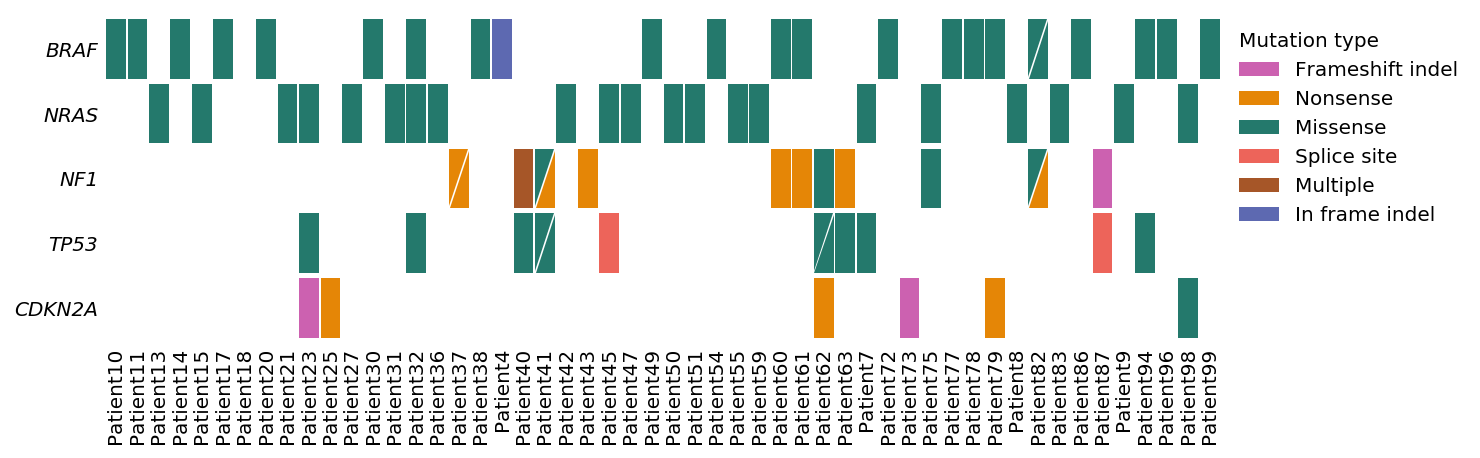

In [9]:
# add data to the CoMut object
example_comut.add_categorical_data(mutation_df, name = 'Mutation type', category_order = genes, mapping = mut_mapping, tick_style = 'italic')

# plot CoMut and add unified legend
example_comut.plot_comut(x_padding = x_padding, y_padding = y_padding, tri_padding = tri_padding, figsize = figsize)
example_comut.add_unified_legend()
example_comut.figure.savefig('quickstart_images/mutation_comut.png', bbox_inches = 'tight', dpi = dpi)

# Adding Clinical Data

The example below adds two rows of clinical data to the CoMut - purity (a continuous variable) and primary type (a categorical variable). Should you wish to add more clinical data, simply mirror the current code and add more with `comut.add_xxx_data`

First we read in the data as dataframes:

In [10]:
purity_data = pd.read_csv('tutorial_data/melanoma_example_data/purity.tsv', sep = '\t') # the path to the purity data
primary_type_data = pd.read_csv('tutorial_data/melanoma_example_data/primary_type.tsv', sep = '\t') # path to primary type data

Then we define color mappings for purity and primary type that define how they appear in the CoMut:

In [11]:
# a color map is required for continuous values
purp_7 = palettable.cartocolors.sequential.Purp_7.mpl_colormap
primary_type_mapping = {'Skin':vivid_10[6], 'Acral': vivid_10[2], 'Occult': vivid_10[-1], 'Mucosal': vivid_10[4]}

Then we add the clinical data to the CoMut and plot it

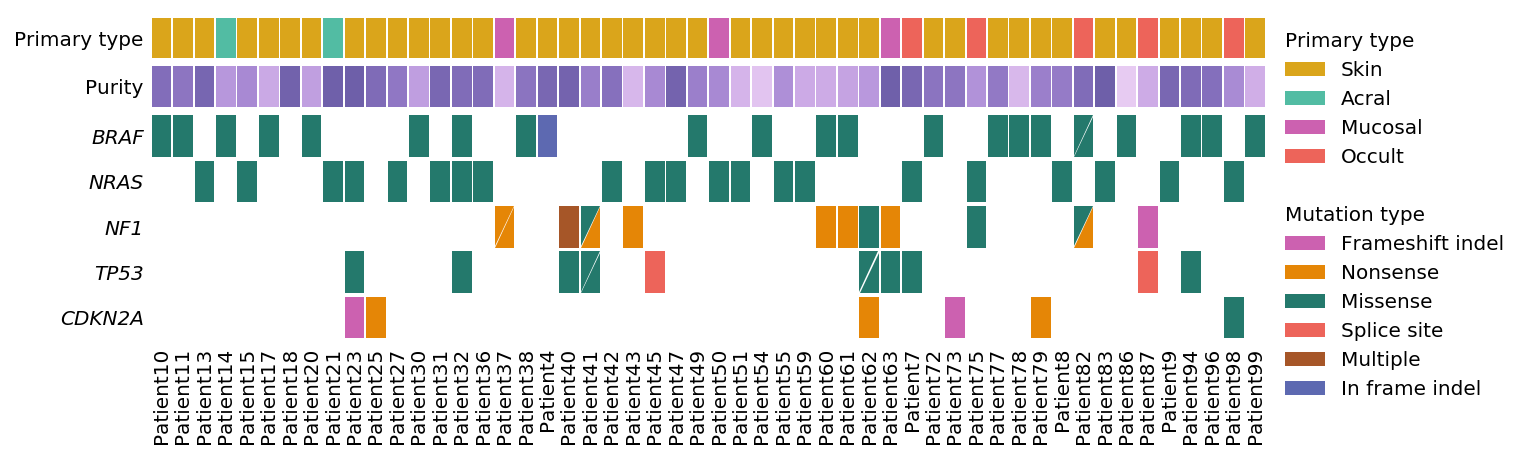

In [12]:
example_comut.add_continuous_data(purity_data, name = 'Purity',  mapping = purp_7)
example_comut.add_categorical_data(primary_type_data, name='Primary type', mapping = primary_type_mapping)

# plot CoMut
example_comut.plot_comut(x_padding = x_padding, y_padding = y_padding, tri_padding = tri_padding, hspace = 0.03, figsize = figsize)
example_comut.add_unified_legend()
example_comut.figure.savefig('quickstart_images/mutation_comut_clinical.png', bbox_inches = 'tight', dpi = dpi)

# Adding a Bar Graph

The example below continues and adds a bar graph on top of the CoMut

First we read in the data as a dataframe:

In [14]:
mut_burden_data = pd.read_csv('tutorial_data/melanoma_example_data/mutational_burden.tsv', sep = '\t')
mut_burden_data.head()

,sample,Clonal,Subclonal
0,Patient41,8924,662
1,Patient62,5401,203
2,Patient49,1442,155
3,Patient51,989,112
4,Patient99,690,190


Then we define a mapping for how the categories should appear in the CoMut:

In [15]:
burden_mapping = {'Clonal':vivid_10[8], 'Subclonal':purp_7(0.5)}

Then we add the data to the CoMut object and plot it:

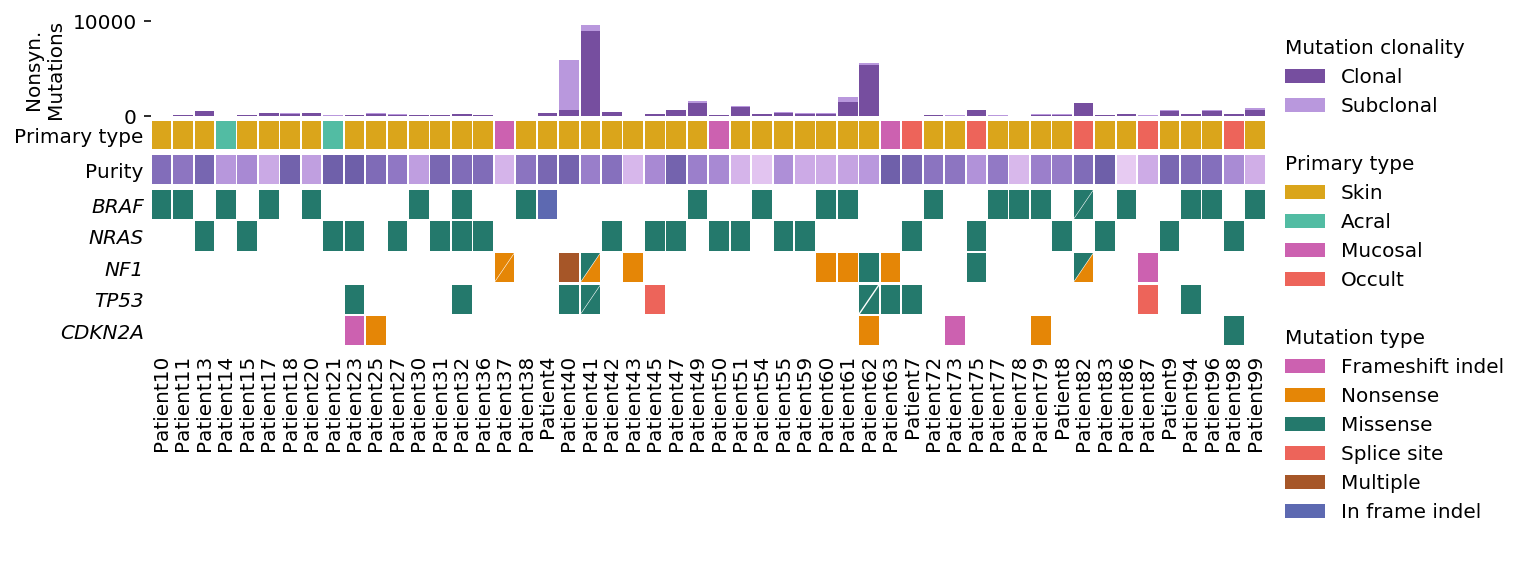

In [16]:
example_comut.add_bar_data(mut_burden_data, name = 'Mutation clonality', mapping = burden_mapping, stacked = True, 
                            ylabel = 'Nonsyn.\nMutations')

# plot CoMut
example_comut.plot_comut(x_padding = x_padding, y_padding = y_padding, tri_padding = tri_padding, hspace = 0.03, figsize = figsize)
example_comut.add_unified_legend()
example_comut.figure.savefig('quickstart_images/mutation_comut_clinical_bar.png', bbox_inches = 'tight', dpi = dpi)

# Adding a Side Bar Graph

We continue the example by adding a side bar indicating the number of samples mutated in a gene. First we read in the data:

In [17]:
mut_freq = pd.read_csv('tutorial_data/melanoma_example_data/mutation_frequency.tsv', sep = '\t')
mut_freq.head()

,category,Mutated samples
0,BRAF,22
1,NRAS,21
2,NF1,11
3,TP53,10
4,CDKN2A,6


Then we define a mapping for how the side bar graph should appear in the CoMut:

In [18]:
side_mapping = {'Mutated samples': 'darkgrey'}

Then we add the data to the CoMut and plot it:

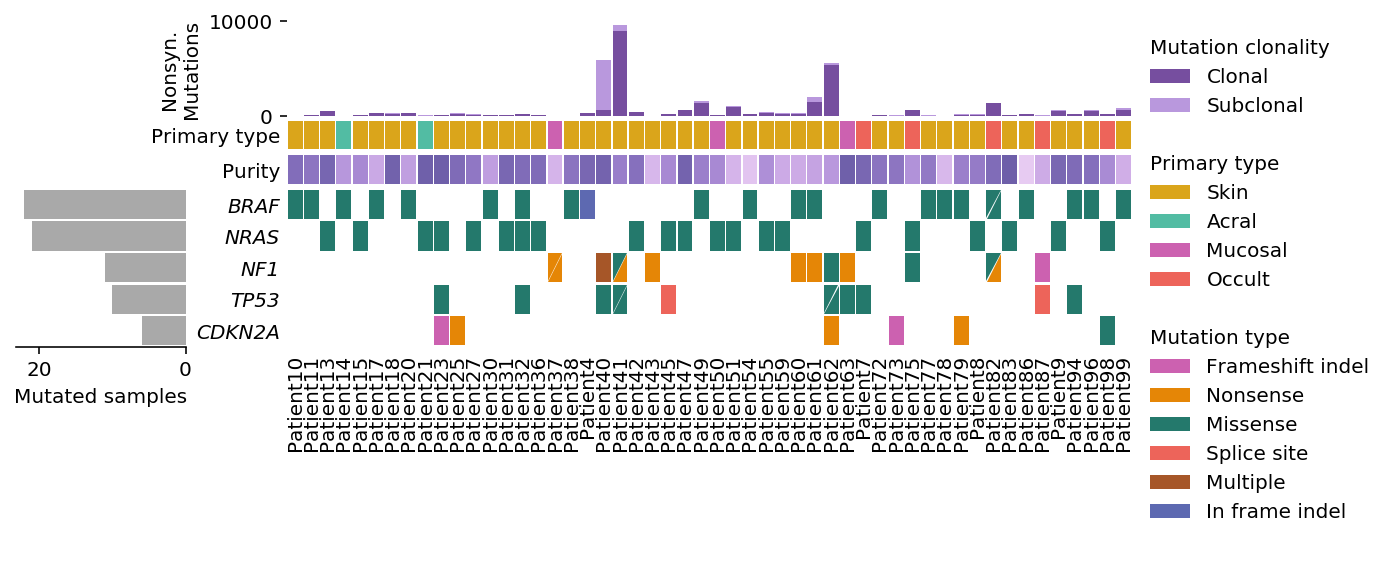

In [20]:
example_comut.add_side_bar_data(mut_freq, paired_name = 'Mutation type', name = 'Mutated samples', position = 'left', 
                                mapping = side_mapping, xlabel = 'Mutated samples')

example_comut.plot_comut(x_padding = x_padding, y_padding = y_padding, tri_padding = tri_padding, hspace = 0.03, figsize = figsize)
example_comut.add_unified_legend(axis_name = 'Mutation clonality')
example_comut.figure.savefig('quickstart_images/mutation_comut_clinical_bar_side.png', bbox_inches = 'tight', dpi = dpi)